In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Zadanie 1

#### Wczytaj dane z planów farmy do programu

In [2]:
sensors = pd.read_csv("data/dane_z_czujnikow.csv", delimiter=";", index_col=False).reset_index()

In [3]:
sensors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223776 entries, 0 to 223775
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              223776 non-null  int64  
 1   sensor_number      223776 non-null  int64  
 2   time               223776 non-null  object 
 3   panel_voltage      223775 non-null  float64
 4   panel_currency     223775 non-null  float64
 5   panel_temperature  223775 non-null  float64
 6   signal_power       223775 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 12.0+ MB


In [4]:
sensors.describe()

,index,sensor_number,panel_voltage,panel_currency,panel_temperature,signal_power
count,223776.000000,223776.000000,223775.000000,223775.000000,223775.000000,223775.000000
mean,111887.500000,1000.890422,32.349607,4.587238,14.555839,-5.463797
std,64598.711256,577.261065,3.299385,2.298543,71.426429,7.620261
min,0.000000,0.000000,-32.865461,0.000000,-33333.000000,-19.829406
25%,55943.750000,501.000000,32.570319,2.404402,11.530000,-11.816542
50%,111887.500000,1000.000000,32.845025,5.351263,16.560000,-5.669459
75%,167831.250000,1501.000000,33.098734,6.596336,20.190000,-0.198301
max,223775.000000,3333.000000,70.352674,50.000000,4000.000000,14.626234


In [5]:
sensors.sample(5)

,index,sensor_number,time,panel_voltage,panel_currency,panel_temperature,signal_power
114398,114398,514,10:51:00,32.618180,7.332624,22.17,-10.525301
10095,10095,107,06:30:00,32.839211,1.276750,1.22,-16.943972
59101,59101,1161,08:30:00,32.628545,5.439903,13.98,-7.516941
100924,100924,1026,10:15:00,32.284365,7.315986,19.20,-5.990596
70345,70345,417,09:00:00,32.850799,6.197568,15.90,-11.139048


#### ● Zaokrąglij czas wykonania pomiaru do 5 min (np. 6:00, 6:05, 6:10…)

In [6]:
sensors.time = pd.to_datetime(sensors.time, format='%H:%M:%S')

In [7]:
sensors.head(3)

,index,sensor_number,time,panel_voltage,panel_currency,panel_temperature,signal_power
0,0,1,1900-01-01 06:05:00,9.751822,0.333651,-0.15,-18.267103
1,1,2,1900-01-01 06:05:00,9.745330,0.332684,-1.82,-18.720157
2,2,3,1900-01-01 06:05:00,9.753105,0.326417,-2.03,-19.148344


In [8]:
sensors.tail(3)

,index,sensor_number,time,panel_voltage,panel_currency,panel_temperature,signal_power
223773,223773,1998,1900-01-01 15:21:00,31.234540,0.359899,9.76,4.614394
223774,223774,1999,1900-01-01 15:21:00,31.351554,0.362072,9.95,5.841928
223775,223775,2000,1900-01-01 15:21:00,31.276916,0.356221,10.74,6.534128


In [9]:
sensors.time = sensors.time.apply(lambda x: x - datetime.timedelta(minutes=x.minute % 5,
                             seconds=x.second,
                             microseconds=x.microsecond))

In [10]:
sensors.head(3)

,index,sensor_number,time,panel_voltage,panel_currency,panel_temperature,signal_power
0,0,1,1900-01-01 06:05:00,9.751822,0.333651,-0.15,-18.267103
1,1,2,1900-01-01 06:05:00,9.745330,0.332684,-1.82,-18.720157
2,2,3,1900-01-01 06:05:00,9.753105,0.326417,-2.03,-19.148344


In [11]:
sensors.tail(3)

,index,sensor_number,time,panel_voltage,panel_currency,panel_temperature,signal_power
223773,223773,1998,1900-01-01 15:20:00,31.234540,0.359899,9.76,4.614394
223774,223774,1999,1900-01-01 15:20:00,31.351554,0.362072,9.95,5.841928
223775,223775,2000,1900-01-01 15:20:00,31.276916,0.356221,10.74,6.534128


#### Wykreśl wykres napięcia, prądu i temperatury od czasu dla kilku przykładowych czujników

In [12]:
def round_hour(t):
    return (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)
               +datetime.timedelta(hours=t.minute//30))

In [13]:
def plot_sensor(sensor_number):
    sensor = sensors[sensors.sensor_number == sensor_number].copy()
    sensor.replace(0, np.nan, inplace=True)
    
    plt.figure(figsize=(10, 6))
    ax = sns.lineplot(data=sensor, x='time', y='panel_voltage', label='Panel Voltage', legend=False)
    sns.lineplot(data=sensor, x='time', y='panel_temperature', label='Panel Temperature', color='g', legend=False, ax=ax)
    
    plt.xlabel('Time')
    plt.ylabel('Panel Voltage')
    
    ax.xaxis.set_major_locator(mdates.HourLocator())
    ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.set_xlim(round_hour(sensor['time'].min()), round_hour(sensor['time'].max()))
    
    ax2 = ax.twinx()
    sns.lineplot(data=sensor, x='time', y='panel_currency', label='Panel Current', color='r', legend=False, ax=ax2)
    plt.ylabel('Panel Current')
    
    plt.title(f'Sensor {sensor_number} data over time')
    ax.figure.legend()
    plt.show()

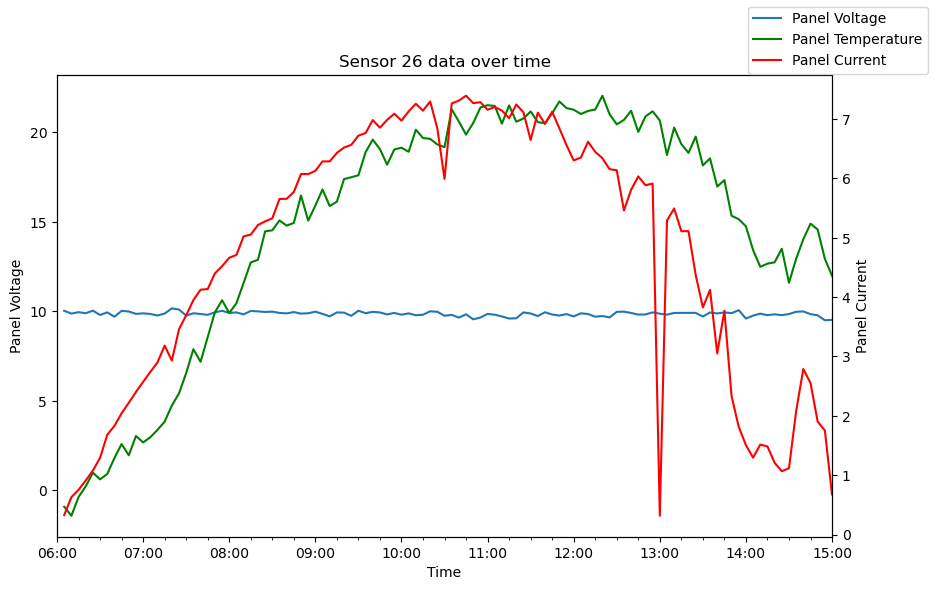

In [14]:
plot_sensor(26)

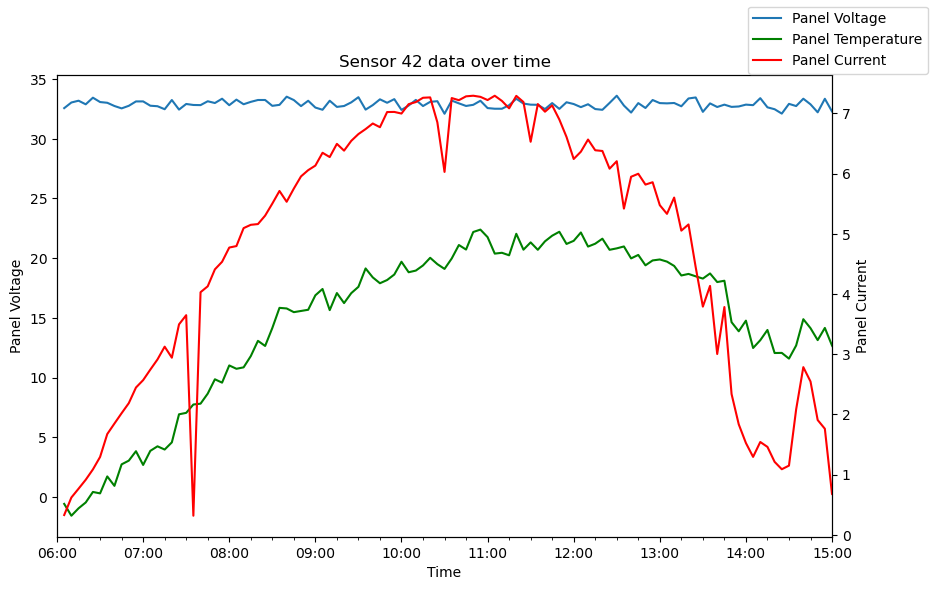

In [15]:
plot_sensor(42)

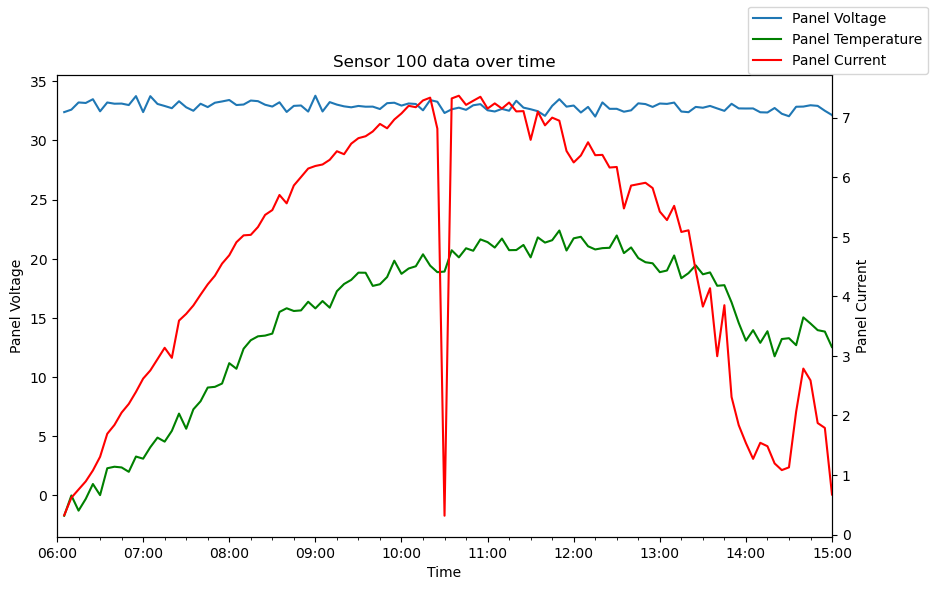

In [16]:
plot_sensor(100)

#### Zweryfikuj poprawność danych z czujników

In [17]:
# error 1
voltage_open_circuit = 39.1
voltage_measurement_error = 0.01 * 50 

# error 2
current_short_circuit = 9.15
current_measurement_error = 0.01 * 20 

# error 3
temp_min = -40
temp_max = 120
temp_measurement_error = 1 

<b>0 <= Napięcie z czujnika <= Napięcie rozwarcia + błąd pomiaru (zakres pomiarowy napięcie* 1%)</b>

In [18]:
error_1 = sensors[(sensors.panel_voltage < 0) | (sensors.panel_voltage > voltage_open_circuit + voltage_measurement_error)].copy()
error_1[["sensor_number", "time", "panel_voltage"]]

,sensor_number,time,panel_voltage
2423,427,1900-01-01 06:10:00,70.352674
9268,1279,1900-01-01 06:25:00,-32.865461
223763,1988,1900-01-01 15:20:00,-31.456735


<b>0 <= Prąd z czujnika <= Prąd zwarcia + błąd pomiaru (zakres pomiarowy prąd* 1%) </b>

In [19]:
error_2 = sensors[(sensors.panel_currency < 0) | (sensors.panel_currency > current_short_circuit + current_measurement_error)].copy()
error_2[["sensor_number", "time", "panel_currency"]]

,sensor_number,time,panel_currency
223279,1504,1900-01-01 15:20:00,44.0
223570,1795,1900-01-01 15:20:00,50.0


<b>Zakres pomiarowy temp min - Błąd pomiaru temperatury <= Temperatura <= zakres pomiarowy temp max + Błąd pomiaru temperatury</b>

In [20]:
error_3 = sensors[(sensors.panel_temperature - temp_measurement_error < temp_min) | (sensors.panel_temperature > temp_max + temp_measurement_error)].copy()
error_3[["sensor_number", "time", "panel_temperature"]]

,sensor_number,time,panel_temperature
220264,486,1900-01-01 15:15:00,4000.0
222634,858,1900-01-01 15:20:00,-2000.0
223093,1318,1900-01-01 15:20:00,-33333.0


<b>Numery czujników z danych pomiarowych z numerami czujników znajdującymi się na farmie</b> 

In [21]:
farm_plan = pd.read_csv("data/dane_z_czujnikow_z_planow_farmy.csv", delimiter=";")
farm_plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sensor_number    2000 non-null   int64  
 1   inverter_number  2000 non-null   int64  
 2   Unnamed: 2       0 non-null      float64
 3   Xsrn             2000 non-null   object 
 4   Ysrn             2000 non-null   object 
 5   Zsrn             2000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 93.9+ KB


In [22]:
sensor_numbers = farm_plan.sensor_number.unique()

In [23]:
error_4 = sensors[~sensors.sensor_number.isin(sensor_numbers)].copy()
error_4[["sensor_number", "time"]]

,sensor_number,time
173826,0,1900-01-01 13:20:00
175823,3333,1900-01-01 13:20:00


<b>Wprowadź system klasyfikacji danych z czujników (dodatkowy parametr).</b>

In [24]:
sensors['status'] = 0b0000000000000000
sensors['status'] = sensors.apply(lambda x: x.status | 0b0000000000000001 if x['index'] in error_1['index'].to_list() else x.status, axis=1)
sensors['status'] = sensors.apply(lambda x: x.status | 0b0000000000000010 if x['index'] in error_2['index'].to_list() else x.status, axis=1)
sensors['status'] = sensors.apply(lambda x: x.status | 0b0000000000000100 if x['index'] in error_3['index'].to_list() else x.status, axis=1)
sensors['status'] = sensors.apply(lambda x: x.status | 0b0000000000001000 if x['index'] in error_4['index'].to_list() else x.status, axis=1)

In [25]:
sensors[sensors.status > 0]

,index,sensor_number,time,panel_voltage,panel_currency,panel_temperature,signal_power,status
2423,2423,427,1900-01-01 06:10:00,70.352674,0.621157,-0.04,-12.969336,1
9268,9268,1279,1900-01-01 06:25:00,-32.865461,1.076609,-0.66,6.664527,1
173826,173826,0,1900-01-01 13:20:00,9.672525,5.084348,19.96,-3.670425,8
175823,175823,3333,1900-01-01 13:20:00,32.495568,5.114509,20.37,5.304427,8
220264,220264,486,1900-01-01 15:15:00,31.816120,0.494646,4000.00,-12.336726,4
222634,222634,858,1900-01-01 15:20:00,31.583484,0.355887,-2000.00,-3.578061,4
223093,223093,1318,1900-01-01 15:20:00,31.173979,0.357905,-33333.00,6.623326,4
223279,223279,1504,1900-01-01 15:20:00,31.701001,44.000000,10.63,-3.754358,2
223570,223570,1795,1900-01-01 15:20:00,31.409635,50.000000,9.61,5.505208,2
223763,223763,1988,1900-01-01 15:20:00,-31.456735,0.364334,9.48,-2.929654,1


#### Czy wszystkie czujniki, które powinny być na farmie działają?

In [26]:
# ciche czujniki
farm_plan[~farm_plan.sensor_number.isin(sensors.sensor_number.unique())]

,sensor_number,inverter_number,Unnamed: 2,Xsrn,Ysrn,Zsrn
53,54,2,NaN,"26,02","2,5474","0,6129"
1165,1166,30,NaN,"10,02","73,4459","0,6129"


In [27]:
reporting_sensors = set(sensors.sensor_number.unique()).intersection(farm_plan.sensor_number.unique())
full_range = pd.date_range(start=sensors.time.min(), end=sensors.time.max(), freq='5T')
missing_data_dict = {"sensor_number": [], "time": []}

In [28]:
for time in full_range:
    active_sensors = sensors[sensors.time == time].sensor_number.unique()
    for missing in [sensor for sensor in reporting_sensors if sensor not in active_sensors]:
        missing_data_dict["sensor_number"].append(missing)
        missing_data_dict["time"].append(time)

In [29]:
# brakujące dane
pd.DataFrame.from_dict(missing_data_dict)

,sensor_number,time
0,1714,1900-01-01 13:20:00
1,1724,1900-01-01 13:20:00


#### Uzupełnij bazę danych o rekordy odpowiadające brakującym pomiarom, które wykonałyby brakujące czujniki.

In [30]:
missing = pd.DataFrame.from_dict(missing_data_dict)
missing["status"] = 0b0000000000010000
for column in sensors.columns:
    if column not in missing.columns:
        missing[column] = np.nan
missing

,sensor_number,time,status,index,panel_voltage,panel_currency,panel_temperature,signal_power
0,1714,1900-01-01 13:20:00,16,NaN,NaN,NaN,NaN,NaN
1,1724,1900-01-01 13:20:00,16,NaN,NaN,NaN,NaN,NaN


In [31]:
sensors = pd.concat([sensors, missing], ignore_index=True).drop('index', axis=1)
sensors.tail(5)

,sensor_number,time,panel_voltage,panel_currency,panel_temperature,signal_power,status
223773,1998,1900-01-01 15:20:00,31.234540,0.359899,9.76,4.614394,0
223774,1999,1900-01-01 15:20:00,31.351554,0.362072,9.95,5.841928,0
223775,2000,1900-01-01 15:20:00,31.276916,0.356221,10.74,6.534128,0
223776,1714,1900-01-01 13:20:00,NaN,NaN,NaN,NaN,16
223777,1724,1900-01-01 13:20:00,NaN,NaN,NaN,NaN,16


#### Czy na farmie znajdują się czujniki, których nie powinno tam być?

In [32]:
# odp: TAK
error_4

,index,sensor_number,time,panel_voltage,panel_currency,panel_temperature,signal_power
173826,173826,0,1900-01-01 13:20:00,9.672525,5.084348,19.96,-3.670425
175823,175823,3333,1900-01-01 13:20:00,32.495568,5.114509,20.37,5.304427


# Zadanie 2

In [33]:
inverters = pd.read_csv("data/dane_z_falownikow.csv", delimiter=";", index_col=False).reset_index()
inverters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             5600 non-null   int64  
 1   time              5600 non-null   object 
 2   inverter_number   5600 non-null   int64  
 3   inverter_voltage  5600 non-null   float64
 4   inverter_current  5600 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 218.9+ KB


In [34]:
inverters.tail(3)

,index,time,inverter_number,inverter_voltage,inverter_current
5597,5597,15:21:00,48,1251.372837,0.360383
5598,5598,15:21:00,49,1256.549318,0.359948
5599,5599,15:21:00,50,1256.754539,0.362565


#### Zaokrąglij czas wykonania pomiaru do 5 min

In [35]:
inverters.time = pd.to_datetime(inverters.time, format='%H:%M:%S')
inverters.time = inverters.time.apply(lambda x: x - datetime.timedelta(minutes=x.minute % 5,
                             seconds=x.second,
                             microseconds=x.microsecond))

In [36]:
inverters.tail(3)

,index,time,inverter_number,inverter_voltage,inverter_current
5597,5597,1900-01-01 15:20:00,48,1251.372837,0.360383
5598,5598,1900-01-01 15:20:00,49,1256.549318,0.359948
5599,5599,1900-01-01 15:20:00,50,1256.754539,0.362565


#### Wykreśl wykres napięcia i prądu od czasu dla kilku przykładowych falowników

In [37]:
def plot_inverter(inverter_number):
    inverter = inverters[inverters.inverter_number == inverter_number].copy()
    inverter.replace(0, np.nan, inplace=True)
    
    plt.figure(figsize=(10, 6))
    ax = sns.lineplot(data=inverter, x='time', y='inverter_voltage', label='Inverter Voltage', legend=False)
    plt.xlabel('Time')
    plt.ylabel('Inverter Voltage')
    
    ax.xaxis.set_major_locator(mdates.HourLocator())
    ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.set_xlim(round_hour(inverter['time'].min()), round_hour(inverter['time'].max()))
    
    ax2 = ax.twinx()
    sns.lineplot(data=inverter, x='time', y='inverter_current', label='Inverter Current', color="r",legend=False, ax=ax2)
    plt.ylabel('Inverter Current')
    plt.title(f'Inverter {inverter_number} data over time')
    ax.figure.legend()
    plt.show()

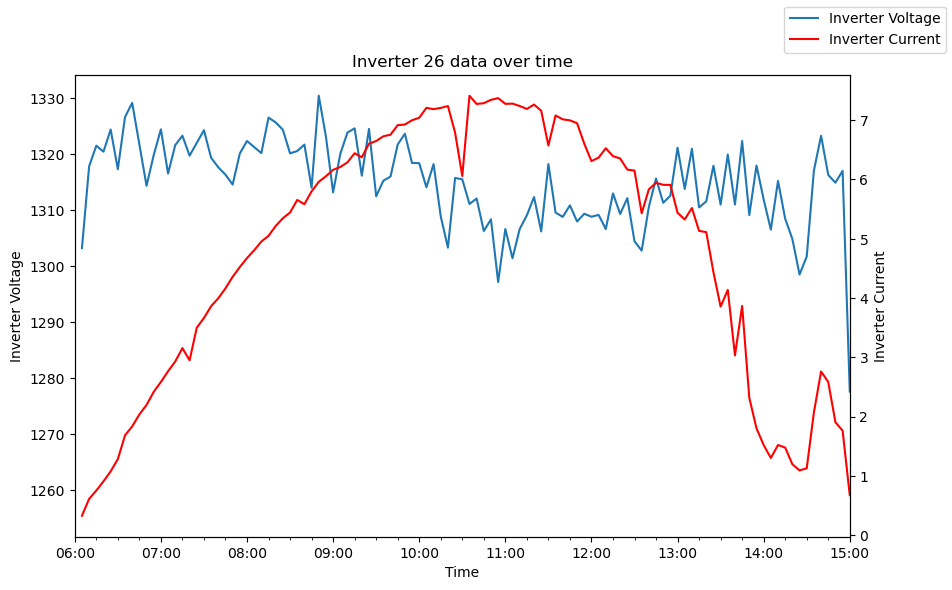

In [38]:
plot_inverter(26)

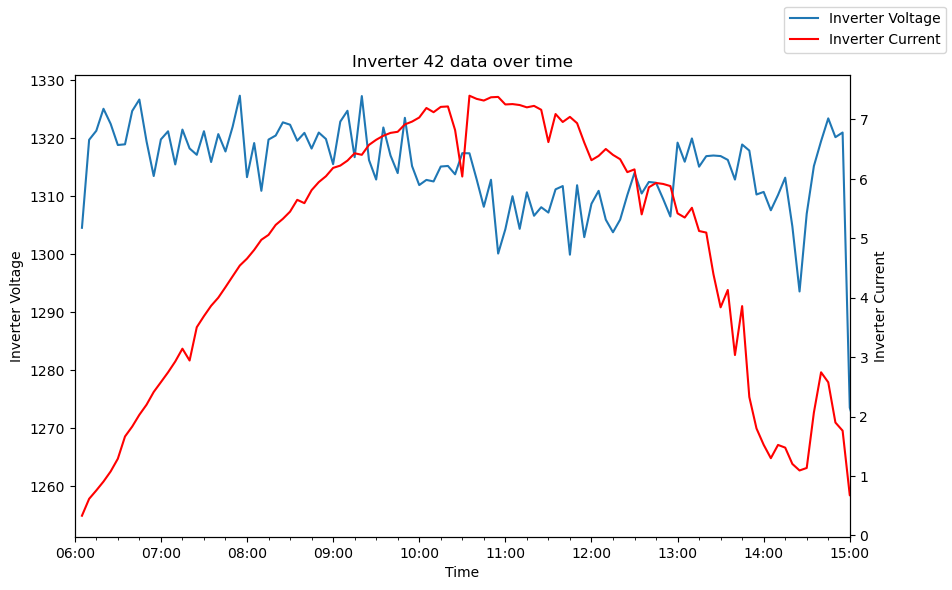

In [39]:
plot_inverter(42)

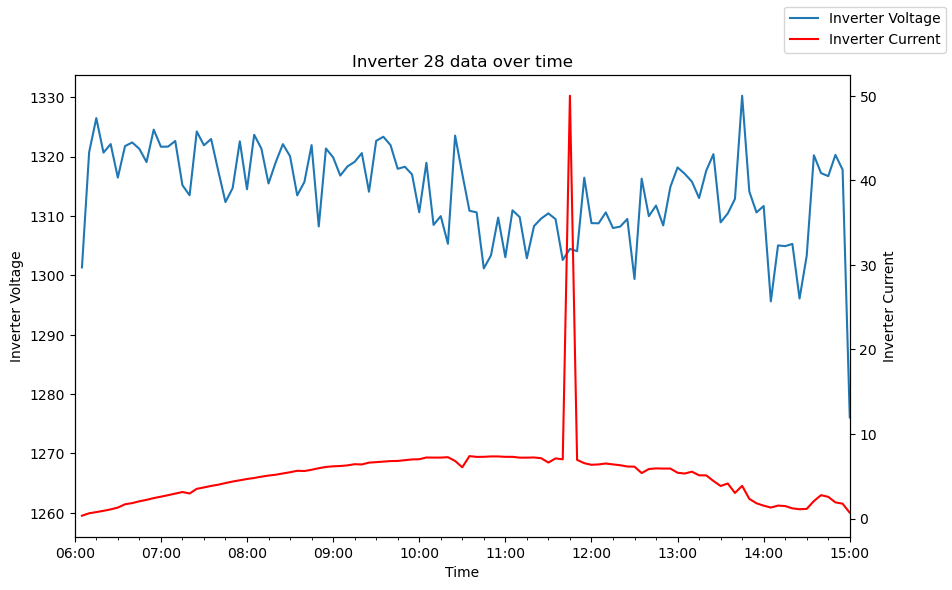

In [40]:
plot_inverter(28)

#### Zweryfikuj poprawność danych z falowników

In [41]:
# error 1
inverter_max_voltage = 2500
inverter_voltage_measurement_error = 20 

# error 2
inverter_max_current = 20
inverter_current_measurement_error = 0.1

# error 3
inverter_min_voltage = 200

# error 4
inverter_failure_voltage = 20

<b>0 <= Napięcie wejściowe falownika <= Napięcie maksymalne falownika + błąd
pomiaru falownika</b>

In [42]:
inv_error_1 = inverters[(inverters.inverter_voltage < 0) | (inverters.inverter_voltage > inverter_max_voltage + inverter_voltage_measurement_error)].copy()
inv_error_1[["inverter_number", "time", "inverter_voltage"]]

,inverter_number,time,inverter_voltage
115,16,1900-01-01 06:15:00,3333.0
5348,60,1900-01-01 14:55:00,-1000.0


<b>0 <= Prąd wejściowy falownika <= Maksymalny prąd falownika + błąd pomiaru
falownika</b>

In [43]:
inv_error_2 = inverters[(inverters.inverter_current < 0) | (inverters.inverter_current > inverter_max_current + inverter_current_measurement_error)].copy()
inv_error_2[["inverter_number", "time", "inverter_current"]]

,inverter_number,time,inverter_current
3427,28,1900-01-01 11:45:00,50.0


<b>niedziałające falowniki (napięcie na falownik mniejsze niż napięcie minimalne
falownika)</b>

In [44]:
inv_error_3 = inverters[inverters.inverter_voltage < inverter_min_voltage].copy()
inv_error_3[["inverter_number", "time", "inverter_voltage"]]

,inverter_number,time,inverter_voltage
5348,60,1900-01-01 14:55:00,-1000.0


<b>zerwanie połączenia linii z falownikiem (napięcie na falowniku mniejsze niż 20 V)</b>

In [45]:
inv_error_4 = inverters[inverters.inverter_voltage < inverter_failure_voltage].copy()
inv_error_4[["inverter_number", "time", "inverter_voltage"]]

,inverter_number,time,inverter_voltage
5348,60,1900-01-01 14:55:00,-1000.0


#### Wprowadź system klasyfikacji danych z falowników

In [46]:
inverters['status'] = 0b0000000000000000
inverters['status'] = inverters.apply(lambda x: x.status | 0b0000000000000001 if x['index'] in inv_error_3['index'].to_list() else x.status, axis=1)
inverters['status'] = inverters.apply(lambda x: x.status | 0b0000000000000010 if x['index'] in inv_error_4['index'].to_list() else x.status, axis=1)
inverters['status'] = inverters.apply(lambda x: x.status | 0b0000000000000100 if x['index'] in inv_error_1['index'].to_list() else x.status, axis=1)
inverters['status'] = inverters.apply(lambda x: x.status | 0b0000000000001000 if x['index'] in inv_error_2['index'].to_list() else x.status, axis=1)

In [47]:
inverters[inverters.status > 0]

,index,time,inverter_number,inverter_voltage,inverter_current,status
115,115,1900-01-01 06:15:00,16,3333.000000,0.755437,4
3427,3427,1900-01-01 11:45:00,28,1304.459383,50.000000,8
5348,5348,1900-01-01 14:55:00,60,-1000.000000,1.775472,7


# Zadanie 3

#### Wylicz napięcie 𝑈𝐶 na każdej linii (ang. stringu) na podstawie danych z czujników.

In [48]:
sensors.shape

(223778, 7)

In [49]:
sensors = sensors.reset_index()
extended = pd.merge(sensors, farm_plan[["sensor_number", "inverter_number"]], how="left", on="sensor_number")
extended = extended[~extended.inverter_number.isna()]

In [50]:
extended.shape

(223776, 9)

In [51]:
extended.head()

,index,sensor_number,time,panel_voltage,panel_currency,panel_temperature,signal_power,status,inverter_number
0,0,1,1900-01-01 06:05:00,9.751822,0.333651,-0.15,-18.267103,0,1.0
1,1,2,1900-01-01 06:05:00,9.745330,0.332684,-1.82,-18.720157,0,1.0
2,2,3,1900-01-01 06:05:00,9.753105,0.326417,-2.03,-19.148344,0,1.0
3,3,4,1900-01-01 06:05:00,10.033559,0.334265,-1.81,-17.651383,0,1.0
4,4,5,1900-01-01 06:05:00,10.094112,0.325427,-1.69,-18.766021,0,1.0


In [52]:
extended["fixed_voltage"] = extended.panel_voltage
for line_number in extended["inverter_number"].unique():
    for i, sensor_data in extended[extended["inverter_number"] == line_number].iterrows():
        if sensor_data.status > 0:
            extended.at[i, "fixed_voltage"] = np.median(extended[(extended.inverter_number == line_number) & (extended.status == 0) & (extended.time == sensor_data.time)].panel_voltage)

In [53]:
lines_voltage = extended[["time", "fixed_voltage", "inverter_number"]].groupby(["inverter_number", "time"]).sum().reset_index().rename(columns={'fixed_voltage': 'line_voltage'})
lines_voltage.head()

,inverter_number,time,line_voltage
0,1.0,1900-01-01 06:05:00,396.941069
1,1.0,1900-01-01 06:10:00,395.791791
2,1.0,1900-01-01 06:15:00,396.000544
3,1.0,1900-01-01 06:20:00,395.709608
4,1.0,1900-01-01 06:25:00,395.136336


#### Wylicz średni prąd 𝐼𝐶 każdej linii (ang. stringu) na podstawie danych z czujników.

In [54]:
lines_current = extended[extended.status==0][["time", "panel_currency", "inverter_number"]].groupby(["inverter_number", "time"]).mean().reset_index().rename(columns={'panel_currency': 'line_current'})
lines_current.head()

,inverter_number,time,line_current
0,1.0,1900-01-01 06:05:00,0.329247
1,1.0,1900-01-01 06:10:00,0.617391
2,1.0,1900-01-01 06:15:00,0.758039
3,1.0,1900-01-01 06:20:00,0.908104
4,1.0,1900-01-01 06:25:00,1.081112


In [55]:
lines = pd.merge(lines_current, lines_voltage, how="left", on=["inverter_number", "time"])

In [56]:
lines.head()

,inverter_number,time,line_current,line_voltage
0,1.0,1900-01-01 06:05:00,0.329247,396.941069
1,1.0,1900-01-01 06:10:00,0.617391,395.791791
2,1.0,1900-01-01 06:15:00,0.758039,396.000544
3,1.0,1900-01-01 06:20:00,0.908104,395.709608
4,1.0,1900-01-01 06:25:00,1.081112,395.136336


#### Wykreśl na jednym wykresie napięcie i prąd od czasu dla danych z falownika i danych wyliczonych na podstawie pomiarów z czujników na tej samej linii

In [57]:
def plot_line(line_number, bands=None):
    line_data = lines[lines.inverter_number == line_number].copy()
    line_data.replace(0, np.nan, inplace=True)
    
    inverter_data = inverters[inverters.inverter_number == line_number].copy()
    inverter_data.replace(0, np.nan, inplace=True)
    
    if bands is not None:
        bands = bands[bands.inverter_number == line_number]
    
    fig, ax = plt.subplots(1,2, figsize=(20, 8))
    
    sns.lineplot(data=inverter_data, x='time', y='inverter_voltage', label='Inverter data', legend=False, color="orange", ax=ax[0])
    sns.lineplot(data=line_data, x='time', y='line_voltage', label='Line data', legend=False, color="g", ax=ax[0])
    if bands is not None:
        ax[0].fill_between(bands.time, bands.volt_low, bands.volt_high, alpha=0.2)
    
    ax[0].set_ylabel('Voltage')
    ax[0].set_title(f'Line {line_number} voltage over time')
    ax[0].figure.legend()
    
    sns.lineplot(data=inverter_data, x='time', y='inverter_current', label='Inverter Current', legend=False, color="orange", ax=ax[1])
    sns.lineplot(data=line_data, x='time', y='line_current', label='Line Current', legend=False, color="g", ax=ax[1])
    if bands is not None:
        ax[1].fill_between(bands.time, bands.curr_low, bands.curr_high, alpha=0.4)
        
    ax[1].set_ylabel('Current')
    ax[1].set_title(f'Line {line_number} current over time')
    
    for axis in ax:
        axis.set_xlabel("Time")
        axis.xaxis.set_major_locator(mdates.HourLocator())
        axis.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
        axis.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        axis.set_xlim(round_hour(inverter_data['time'].min()), round_hour(inverter_data['time'].max()))
        
    plt.show()

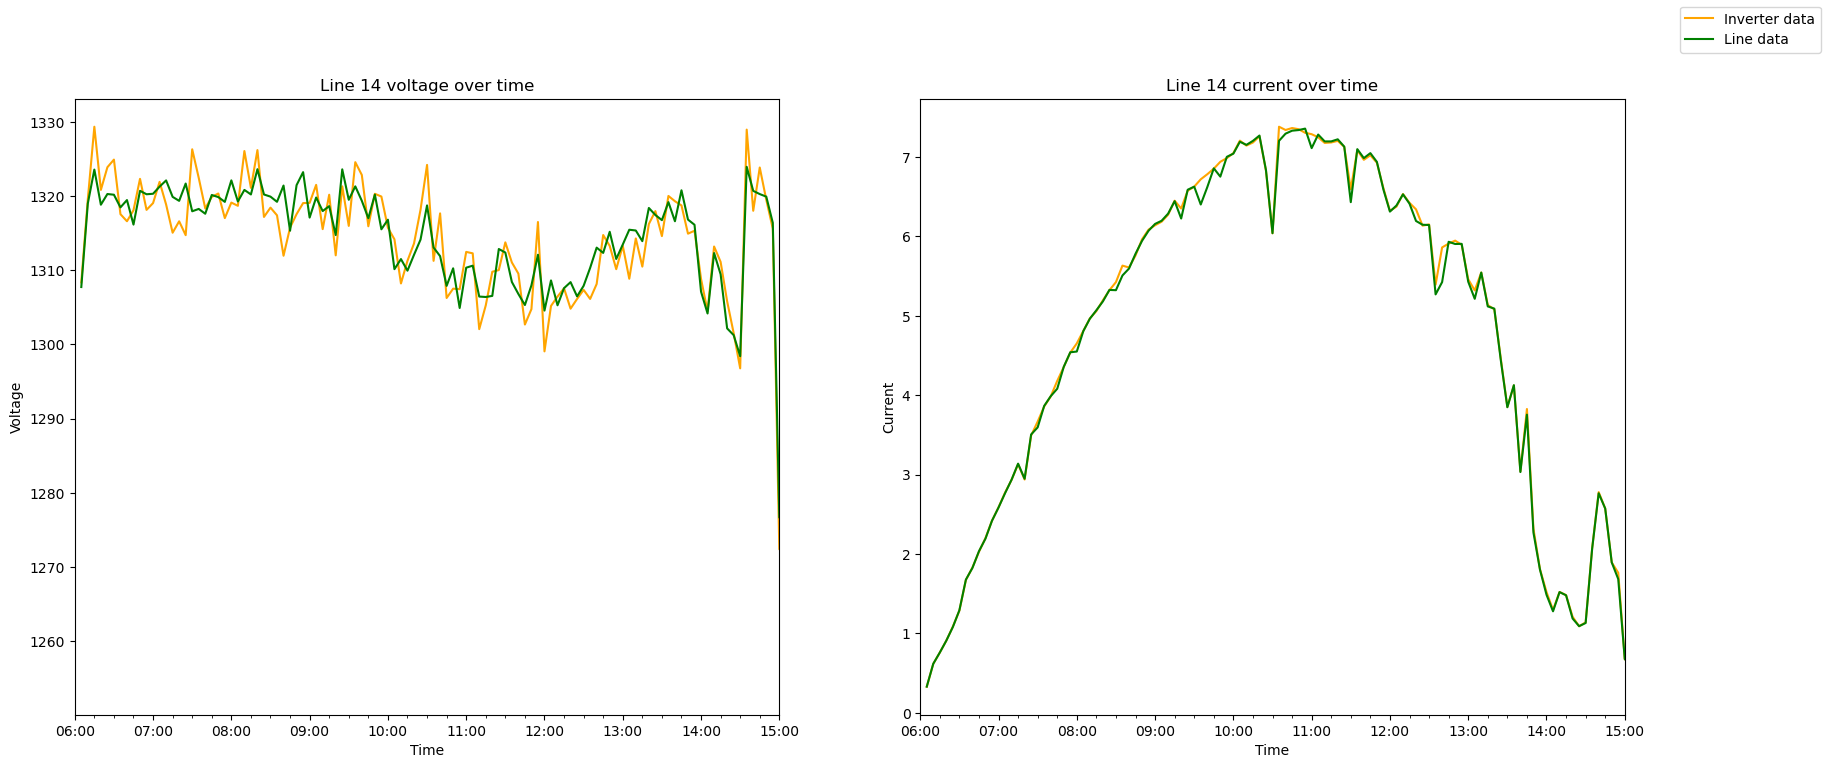

In [58]:
plot_line(14)

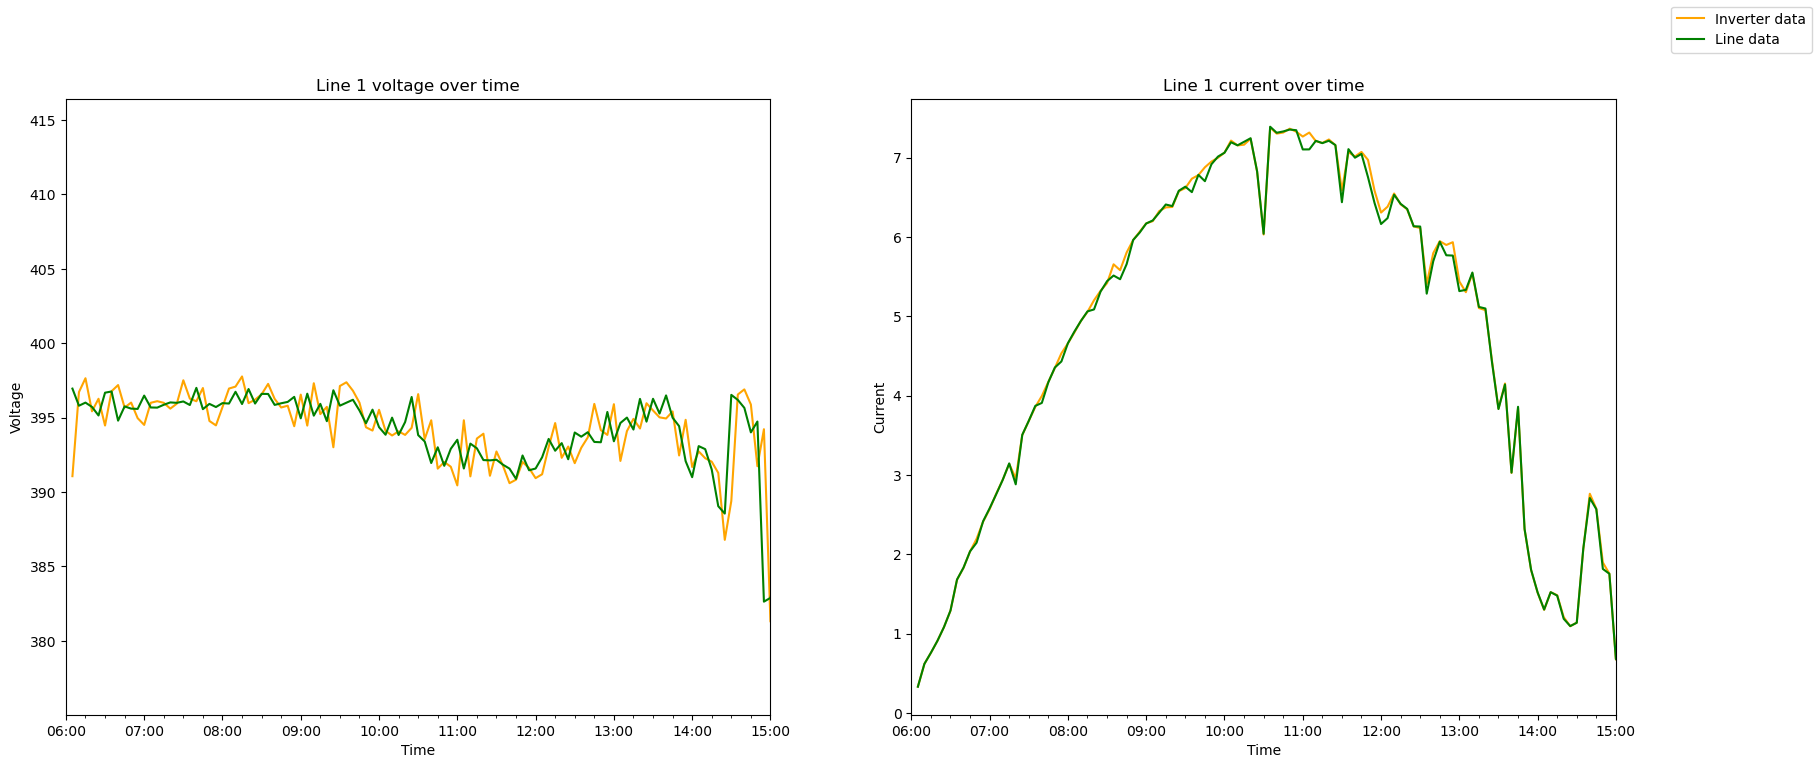

In [59]:
plot_line(1)

Odp. Różnice mogą wynikać z błedów pomiarowych podczas zbierania odczytów ze wszystkch urządzeń

#### Wylicz zakresy zgodności dla danych obliczonych i danych z falownika

In [60]:
errors = pd.merge(lines, inverters, how="left", on=["inverter_number", "time"])

In [61]:
errors["line_curr_low_band"] = errors.line_current - 0.2
errors["line_curr_high_band"] = errors.line_current + 0.2
errors["line_volt_low_band"] = errors.line_voltage - 0.5 * 40 # number of sensors in line
errors["line_volt_high_band"] = errors.line_voltage + 0.5 * 40 # number of sensors in line

errors["inverter_volt_low_band"] = errors.inverter_voltage - 20
errors["inverter_volt_high_band"] = errors.inverter_voltage + 20
errors["inverter_curr_low_band"] = errors.inverter_current - 0.1
errors["inverter_curr_high_band"] = errors.inverter_current + 0.1

errors["volt_low"] = errors.apply(lambda x: max(x.line_volt_low_band, x.inverter_volt_low_band), axis=1)
errors["volt_high"] = errors.apply(lambda x: min(x.line_volt_high_band, x.inverter_volt_high_band), axis=1)

errors["curr_low"] = errors.apply(lambda x: max(x.line_curr_low_band, x.inverter_curr_low_band), axis=1)
errors["curr_high"] = errors.apply(lambda x: min(x.line_curr_high_band, x.inverter_curr_high_band), axis=1)

In [62]:
errors.head()

,inverter_number,time,line_current,line_voltage,index,inverter_voltage,inverter_current,status,line_curr_low_band,line_curr_high_band,line_volt_low_band,line_volt_high_band,inverter_volt_low_band,inverter_volt_high_band,inverter_curr_low_band,inverter_curr_high_band,volt_low,volt_high,curr_low,curr_high
0,1.0,1900-01-01 06:05:00,0.329247,396.941069,0.0,391.057400,0.330664,0.0,0.129247,0.529247,376.941069,416.941069,371.057400,411.057400,0.230664,0.430664,376.941069,411.057400,0.230664,0.430664
1,1.0,1900-01-01 06:10:00,0.617391,395.791791,50.0,396.706704,0.617029,0.0,0.417391,0.817391,375.791791,415.791791,376.706704,416.706704,0.517029,0.717029,376.706704,415.791791,0.517029,0.717029
2,1.0,1900-01-01 06:15:00,0.758039,396.000544,100.0,397.637713,0.756998,0.0,0.558039,0.958039,376.000544,416.000544,377.637713,417.637713,0.656998,0.856998,377.637713,416.000544,0.656998,0.856998
3,1.0,1900-01-01 06:20:00,0.908104,395.709608,150.0,395.415986,0.907316,0.0,0.708104,1.108104,375.709608,415.709608,375.415986,415.415986,0.807316,1.007316,375.709608,415.415986,0.807316,1.007316
4,1.0,1900-01-01 06:25:00,1.081112,395.136336,200.0,396.259724,1.080864,0.0,0.881112,1.281112,375.136336,415.136336,376.259724,416.259724,0.980864,1.180864,376.259724,415.136336,0.980864,1.180864


#### Jeszcze raz wykreśl wykresy uzupełnione przez przedziały zgodności

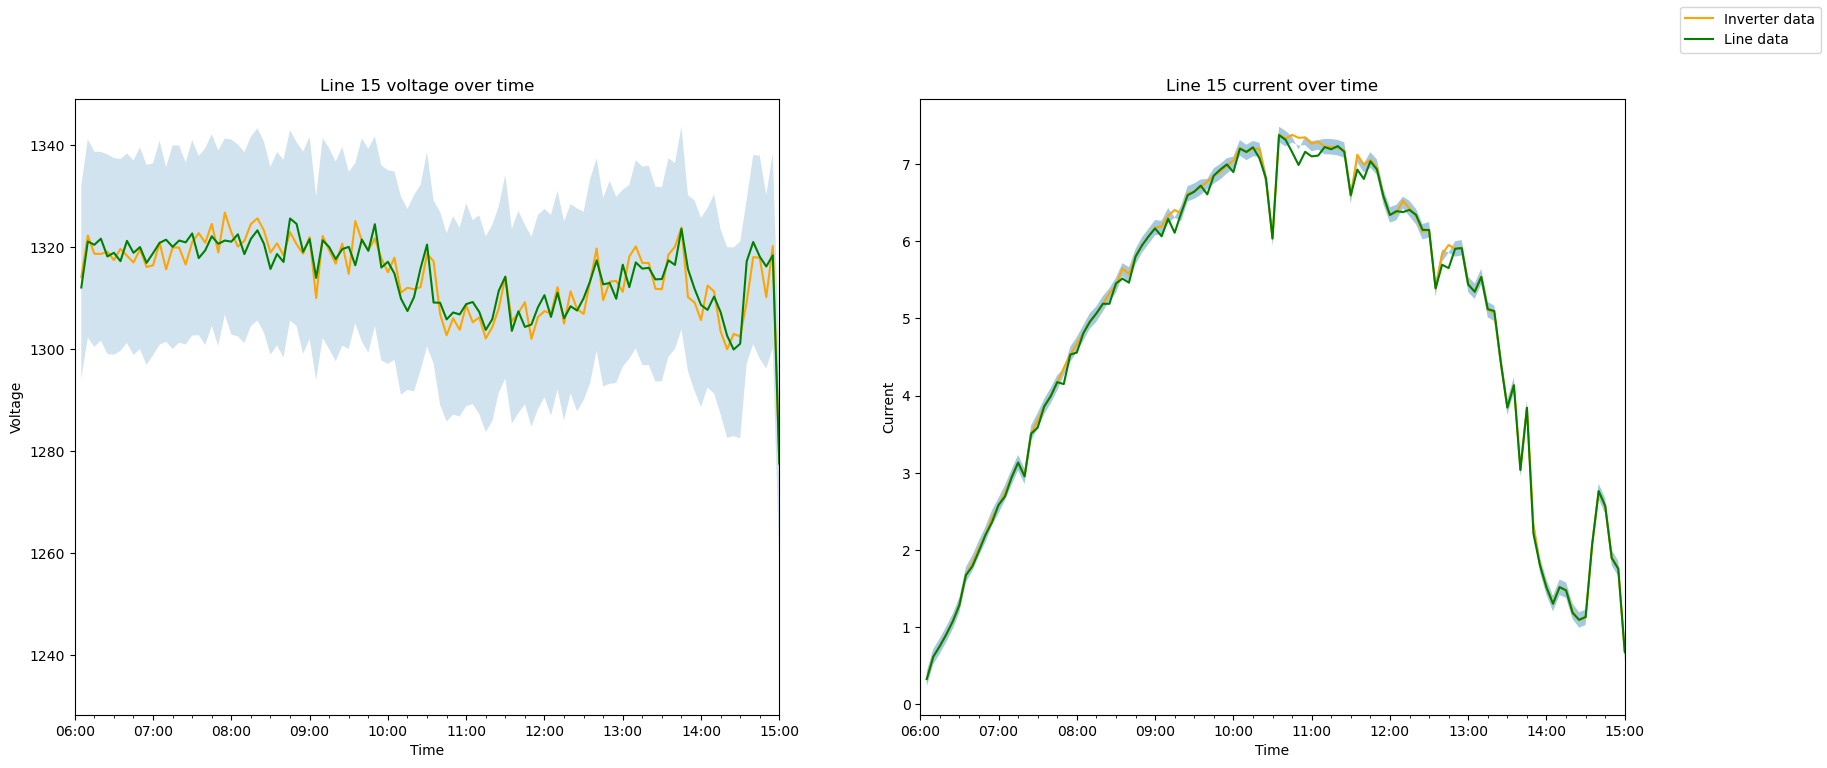

In [63]:
plot_line(15, bands=errors)

#### Wypisz wszystkie linie, w których dane z falowników są niezgodne z danymi wyliczonymi z czujników 

Odp: nie we wszystkich przypdkach dane są zgodne. Może to wynikać z błędów pomiarów lub awarii.

In [64]:
errors[(errors.line_curr_low_band > errors.inverter_curr_high_band) | (errors.inverter_curr_low_band > errors.line_curr_high_band)]["inverter_number"].value_counts()

inverter_number
50.0    4
34.0    4
24.0    3
18.0    3
33.0    3
40.0    3
47.0    3
42.0    3
31.0    2
28.0    2
13.0    2
14.0    2
16.0    2
19.0    2
11.0    2
36.0    2
39.0    2
26.0    1
20.0    1
15.0    1
9.0     1
8.0     1
5.0     1
10.0    1
3.0     1
23.0    1
41.0    1
43.0    1
46.0    1
44.0    1
48.0    1
49.0    1
Name: count, dtype: int64

In [65]:
errors[(errors.line_volt_low_band > errors.inverter_volt_high_band) | (errors.inverter_volt_low_band > errors.line_volt_high_band)]["inverter_number"].value_counts()

inverter_number
2.0     52
30.0     2
16.0     1
24.0     1
Name: count, dtype: int64

####  Znajdź pomiary prądu, które odbiegają znacznie od danych z falownika. Ustaw tym pomiarom 6 bit statusu jako 1

In [66]:
sensors_inverters = pd.merge(extended, inverters, how="left", on=["inverter_number", "time"])
invalid_sensors = sensors_inverters[(sensors_inverters.panel_currency < 0.95 * sensors_inverters.inverter_current) | (sensors_inverters.panel_currency > 1.05 * sensors_inverters.inverter_current)]
sensors['status'] = sensors.apply(lambda x: x.status | 0b0000000000100000 if x['index'] in invalid_sensors['index_x'].to_list() else x.status, axis=1)

In [67]:
sensors[sensors.status >= 32].head(5)

,index,sensor_number,time,panel_voltage,panel_currency,panel_temperature,signal_power,status
426,426,428,1900-01-01 06:05:00,33.171746,0.278208,-1.25,-12.622054,32
1000,1000,1002,1900-01-01 06:05:00,33.310825,0.233045,-0.47,-8.324902,32
2424,2424,428,1900-01-01 06:10:00,33.132154,0.525399,0.06,-12.963588,32
2998,2998,1002,1900-01-01 06:10:00,33.085956,0.426097,-1.36,-8.389316,32
4422,4422,428,1900-01-01 06:15:00,32.913206,0.639840,-1.11,-12.481166,32


# Zadanie 4

In [68]:
forecast = pd.read_csv("data/dane_prognoza.csv", delimiter=";", index_col=False).reset_index()
forecast.time = pd.to_datetime(forecast.time, format='%H:%M:%S')
forecast.time = forecast.time.apply(lambda x: x - datetime.timedelta(minutes=x.minute % 5,
                             seconds=x.second,
                             microseconds=x.microsecond))

In [69]:
forecast

,index,time,PV_voltage,PV_current
0,0,1900-01-01 06:05:00,33.096020,0.346176
1,1,1900-01-01 06:10:00,33.415716,0.651684
2,2,1900-01-01 06:15:00,33.504708,0.794126
3,3,1900-01-01 06:20:00,33.590341,0.955369
4,4,1900-01-01 06:25:00,33.307310,1.136349
...,...,...,...,...
107,107,1900-01-01 15:00:00,32.362344,0.708722
108,108,1900-01-01 15:05:00,32.247987,0.652245
109,109,1900-01-01 15:10:00,32.343623,0.718331
110,110,1900-01-01 15:15:00,31.993080,0.520590


#### Wykorzystaj dane z prognozy do przeanalizowania danych z czujników pod kątem zacienienia modułów

In [70]:
temp = sensors_inverters[["time", "sensor_number", "panel_voltage", "panel_currency", "inverter_voltage", "inverter_current", "status_x", "status_y"]].rename(columns={"status_x":"panel_status", "status_y":"inverter_status"})
with_forecast = pd.merge(temp, forecast[["time", "PV_voltage", "PV_current"]], how="left", on=["time"]).rename(columns={"PV_voltage": "forecast_voltage", "PV_current": "forecast_current"}).reset_index()
with_forecast.head(5)

,index,time,sensor_number,panel_voltage,panel_currency,inverter_voltage,inverter_current,panel_status,inverter_status,forecast_voltage,forecast_current
0,0,1900-01-01 06:05:00,1,9.751822,0.333651,391.0574,0.330664,0,0.0,33.09602,0.346176
1,1,1900-01-01 06:05:00,2,9.745330,0.332684,391.0574,0.330664,0,0.0,33.09602,0.346176
2,2,1900-01-01 06:05:00,3,9.753105,0.326417,391.0574,0.330664,0,0.0,33.09602,0.346176
3,3,1900-01-01 06:05:00,4,10.033559,0.334265,391.0574,0.330664,0,0.0,33.09602,0.346176
4,4,1900-01-01 06:05:00,5,10.094112,0.325427,391.0574,0.330664,0,0.0,33.09602,0.346176


<b>Ustaw 9 bit statusu jako 1 dla pomiarów napięcia odbiegający od prognozy o więcej niż 15%</b>

In [71]:
dev_15 = with_forecast[(with_forecast.panel_voltage < 0.85 * with_forecast.forecast_voltage) | (with_forecast.panel_voltage > 1.15 * with_forecast.forecast_voltage)]
with_forecast['panel_status'] = with_forecast.apply(lambda x: x.panel_status | 1<<8 if x['index'] in dev_15['index'].to_list() else x.panel_status, axis=1)
dev_15.shape

(4692, 11)

<b>Ustaw 10 bit statusu jako 1 dla pomiarów napięcia odbiegający od prognozy o więcej niż 33%</b>

In [72]:
dev_33 = with_forecast[(with_forecast.panel_voltage < 0.67 * with_forecast.forecast_voltage) | (with_forecast.panel_voltage > 1.33 * with_forecast.forecast_voltage)]
with_forecast['panel_status'] = with_forecast.apply(lambda x: x.panel_status | 1<<9 if x['index'] in dev_33['index'].to_list() else x.panel_status, axis=1)
dev_33.shape

(4692, 11)

<b>Ustaw 11 bit statusu jako 1 dla pomiarów napięcia odbiegający od prognozy o więcej niż 66%</b>

In [73]:
dev_66 = with_forecast[(with_forecast.panel_voltage < 0.34 * with_forecast.forecast_voltage) | (with_forecast.panel_voltage > 1.66 * with_forecast.forecast_voltage)]
with_forecast['panel_status'] = with_forecast.apply(lambda x: x.panel_status | 1<<10 if x['index'] in dev_66['index'].to_list() else x.panel_status, axis=1)
dev_66.shape

(4536, 11)

<b>Przeanalizuj zebrane dane pod kątem uszkodzenia modułów</b>

In [74]:
sus = with_forecast[with_forecast.panel_status >= 1<<8]
sus.shape

(4692, 11)

In [75]:
sus.head()

,index,time,sensor_number,panel_voltage,panel_currency,inverter_voltage,inverter_current,panel_status,inverter_status,forecast_voltage,forecast_current
0,0,1900-01-01 06:05:00,1,9.751822,0.333651,391.0574,0.330664,1792,0.0,33.09602,0.346176
1,1,1900-01-01 06:05:00,2,9.745330,0.332684,391.0574,0.330664,1792,0.0,33.09602,0.346176
2,2,1900-01-01 06:05:00,3,9.753105,0.326417,391.0574,0.330664,1792,0.0,33.09602,0.346176
3,3,1900-01-01 06:05:00,4,10.033559,0.334265,391.0574,0.330664,1792,0.0,33.09602,0.346176
4,4,1900-01-01 06:05:00,5,10.094112,0.325427,391.0574,0.330664,1792,0.0,33.09602,0.346176


In [76]:
num_of_timestamps = len(sus.time.unique())

In [77]:
sus = sus[["sensor_number", "index"]].groupby("sensor_number").count().reset_index().rename(columns={"index": "invalid_measurements"})
sus.invalid_measurements = sus.invalid_measurements / num_of_timestamps

In [78]:
sus.sort_values("invalid_measurements").head(10)

,sensor_number,invalid_measurements
46,1988,0.008929
43,427,0.008929
45,1279,0.008929
40,53,0.232143
41,55,0.250000
42,137,0.392857
39,40,0.991071
0,1,1.000000
8,9,1.000000
1,2,1.000000


<b>Czasowe zacienienia modułów</b>

In [79]:
sus[sus.invalid_measurements < 0.9]

,sensor_number,invalid_measurements
40,53,0.232143
41,55,0.250000
42,137,0.392857
43,427,0.008929
45,1279,0.008929
46,1988,0.008929


<b>Stałe uszkodzenie/zabrudzenie modułów</b>

In [80]:
sus[sus.invalid_measurements >= 0.9]

,sensor_number,invalid_measurements
0,1,1.000000
1,2,1.000000
2,3,1.000000
3,4,1.000000
4,5,1.000000
5,6,1.000000
6,7,1.000000
7,8,1.000000
8,9,1.000000
9,10,1.000000
